In [ ]:
!pip install scipy

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and clustering tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Kneedle algorithm for optimal cluster detection
from kneed import KneeLocator

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target

In [3]:
print("First 5 rows of the dataset:")
print(X.head())
print("\nDataset Description:")
print(X.describe())
print("\nCheck for Missing Values:")
print(X.isnull().sum())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.30

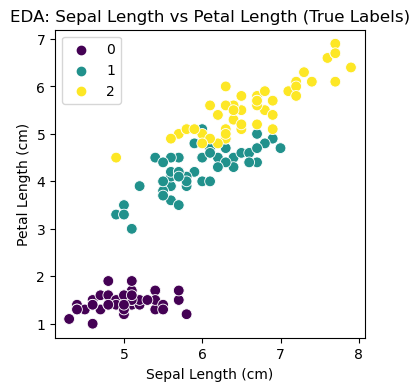

In [4]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=y_true, palette='viridis', s=60)
plt.title('EDA: Sepal Length vs Petal Length (True Labels)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [6]:
X_train, X_test, y_train_true, y_test_true = train_test_split(X, y_true, test_size=0.2, random_state=42, stratify=y_true)

In [7]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Test set size: 30 samples


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
Z = linkage(X_train_scaled, method='ward', metric='euclidean')

In [11]:
Z

array([[4.60000000e+01, 5.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 8.00000000e+01, 1.31669212e-01, 2.00000000e+00],
       [4.50000000e+01, 5.40000000e+01, 1.31669212e-01, 2.00000000e+00],
       [5.80000000e+01, 1.16000000e+02, 1.32227491e-01, 2.00000000e+00],
       [2.40000000e+01, 7.60000000e+01, 1.43390808e-01, 2.00000000e+00],
       [1.60000000e+01, 2.10000000e+01, 1.43390808e-01, 2.00000000e+00],
       [2.30000000e+01, 4.40000000e+01, 1.64792405e-01, 2.00000000e+00],
       [8.40000000e+01, 1.00000000e+02, 1.64792405e-01, 2.00000000e+00],
       [6.30000000e+01, 1.14000000e+02, 1.70344596e-01, 2.00000000e+00],
       [2.90000000e+01, 1.22000000e+02, 1.70561054e-01, 3.00000000e+00],
       [8.90000000e+01, 1.21000000e+02, 1.70561054e-01, 3.00000000e+00],
       [7.20000000e+01, 1.15000000e+02, 1.77754743e-01, 2.00000000e+00],
       [1.50000000e+01, 1.23000000e+02, 1.77823439e-01, 3.00000000e+00],
       [1.07000000e+02, 1.08000000e+02, 1.86603566e

In [ ]:
# Plot dendrogram

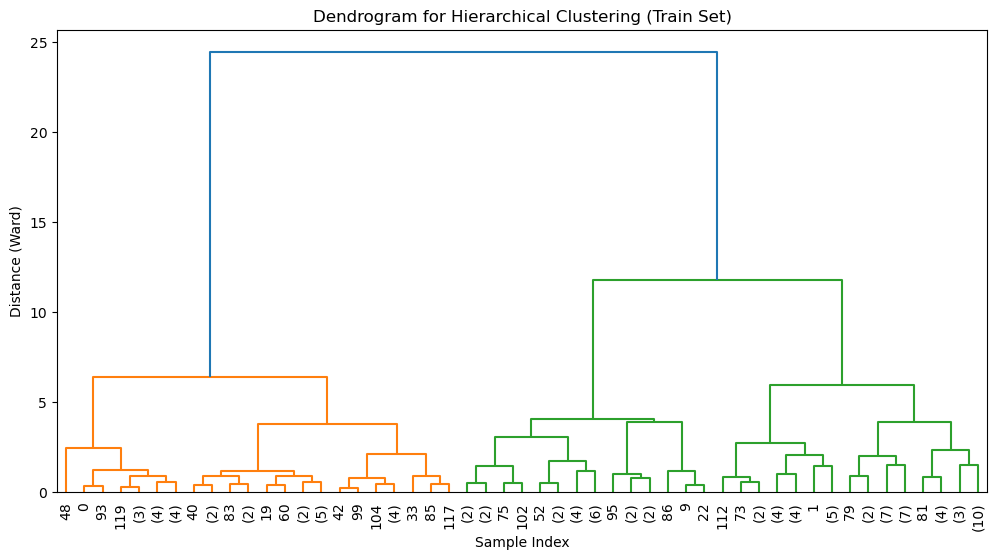

In [14]:
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering (Train Set)')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.show()

In [15]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    # Cut dendrogram to get k clusters
    labels = fcluster(Z, k, criterion='maxclust')
    # Compute WCSS manually
    wcss_k = 0
    for cluster in range(1, k + 1):
        cluster_points = X_train_scaled[labels == cluster]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            wcss_k += np.sum((cluster_points - centroid) ** 2)
    wcss.append(wcss_k)
print("\nWCSS values for k=1 to 10 (Train Set):")


WCSS values for k=1 to 10 (Train Set):


In [16]:
for k, w in zip(k_range, wcss):
    print(f"k={k}: WCSS={w:.4f}")

k=1: WCSS=480.0000
k=2: WCSS=181.2279
k=3: WCSS=111.9571
k=4: WCSS=91.3411
k=5: WCSS=73.7761
k=6: WCSS=65.4981
k=7: WCSS=57.8857
k=8: WCSS=50.3385
k=9: WCSS=43.1551
k=10: WCSS=38.4367


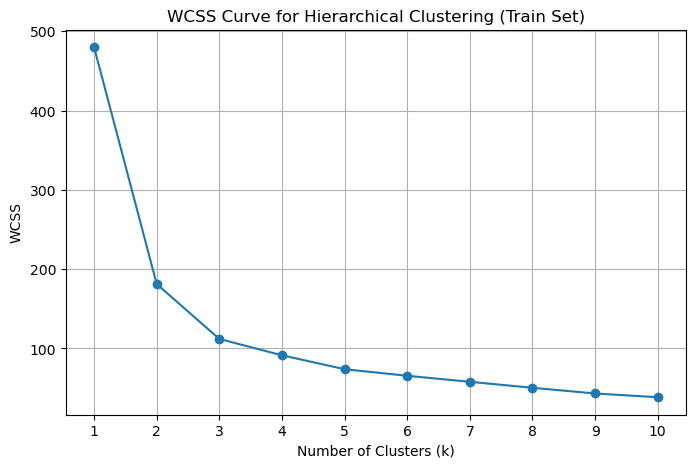

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('WCSS Curve for Hierarchical Clustering (Train Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [18]:
knee = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"\nOptimal number of clusters (Kneedle): {optimal_k}")



Optimal number of clusters (Kneedle): 3


In [19]:
silhouette_scores = []
for k in k_range[1:]:  # Start from k=2, as silhouette score is undefined for k=1
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(X_train_scaled, labels)
    silhouette_scores.append(score)
print("\nSilhouette scores for k=2 to 10 (Train Set):")
for k, s in zip(k_range[1:], silhouette_scores):
    print(f"k={k}: Silhouette Score={s:.4f}")


Silhouette scores for k=2 to 10 (Train Set):
k=2: Silhouette Score=0.5759
k=3: Silhouette Score=0.4867
k=4: Silhouette Score=0.4195
k=5: Silhouette Score=0.3504
k=6: Silhouette Score=0.3358
k=7: Silhouette Score=0.3364
k=8: Silhouette Score=0.3563
k=9: Silhouette Score=0.3434
k=10: Silhouette Score=0.3578


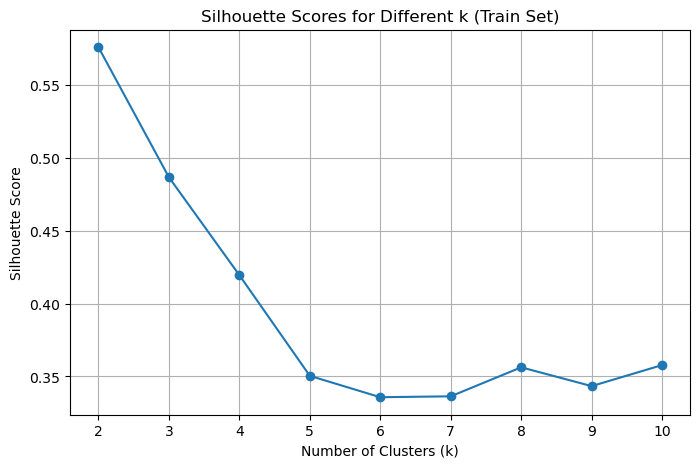

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k (Train Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range[1:])
plt.grid(True)
plt.show()

In [ ]:
# Apply hierarchical clustering with optimal k

In [27]:
y_train_clusters = fcluster(Z, 2, criterion='maxclust')

In [28]:
# Predict clusters for test set using nearest centroid

In [29]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train_scaled, y_train_clusters)
y_test_clusters = clf.predict(X_test_scaled)

In [30]:
# Reduce dimensionality for visualization using PCA

In [31]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

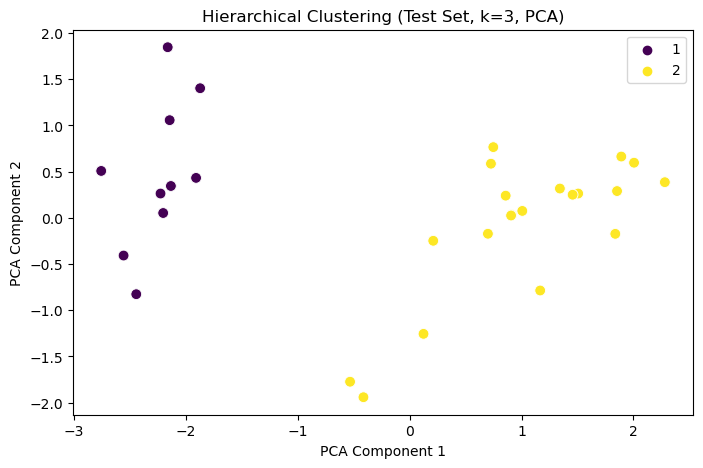

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test_clusters, palette='viridis', s=60)
plt.title(f'Hierarchical Clustering (Test Set, k={optimal_k}, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [33]:
X_train_copy = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
X_train_copy['Cluster'] = y_train_clusters
print("\nMean feature values per cluster (Train Set):")
print(X_train_copy.groupby('Cluster').mean())


Mean feature values per cluster (Train Set):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
1                -1.022989          0.820924          -1.301717   
2                 0.511495         -0.410462           0.650858   

         petal width (cm)  
Cluster                    
1               -1.250858  
2                0.625429  
